# Learning Rate study

Deep learning neural networks are trained using the stochastic gradient descent optimization algorithm. The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated. Choosing the learning rate is challenging as a value too small may result in a long training process that could get stuck, whereas a value too large may result in learning a sub-optimal set of weights too fast or an unstable training process.


In this notebook, we will cover the effects of the learning rate, momentum and learning rate schedules

  
    

# The data

We will use a self-made data

Multi-Class Classification Problem

We will use a small multi-class classification problem as the basis to demonstrate the effect of learning rate on model performance.

The scikit-learn class provides the make_blobs() function that can be used to create a multi-class classification problem with the prescribed number of samples, input variables, classes, and variance of samples within a class.

<font color=red><b>Generate a dataset composed of 1000 samples with 3 classes and 2 features. Plot the result
<br>Hint: use the blobs kmaker from sklearn and the given parameters</b>
</font>

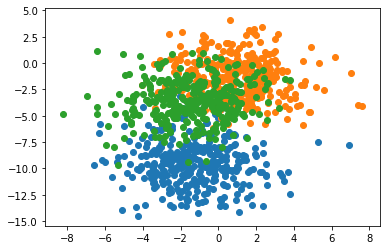

In [1]:
# scatter plot of blobs dataset
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

cluster_std = 2 # force classes to be not linearly separable
random_state = 2

# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# scatter plot for each class value
for class_value in range(3):
    # scatter plot for points with a different color
    plt.scatter(X[y == class_value, 0], X[y == class_value, 1])
# show plot
plt.show()

## Effect of Learning Rate

In this section, we will develop a  model to address the blobs classification problem and investigate the effect of different learning rates

<font color=red><b>Generate a function for creating training and testing datasets. Remember the labels must be in a categorical format
<br>Hint: use the imported functions </b>
</font>

In [2]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
# prepare train and test dataset
def prepare_data():
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
    # one hot encode output variable
    y = to_categorical(y)
    # split into train and test. Is order ok?
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

In [3]:
 # For easy reset of notebook state.
# study of learning rate on accuracy for blobs problem
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

from matplotlib import pyplot

<font color=red><b>Create a function for generating a model with a the following configuration:
    - dense layer with 50 units, relu-activated. 
    - dense layer with the categories amount as units, softmax activated.
<br>use stochastic gradient descent as the optimizer andcompile using categorical crossentropy and accuracy as the metric. Define the fit as a history for plotting </b>
<br>Hint: use the imported functions </b>
</font>

In [4]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, lrate):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # compile model
    opt = SGD(lr=lrate)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('lrate='+str(lrate), pad=-50)

<font color=red><b> Prepare the data and train on different learning rates. Show the results and discuss about them
<br>Hint: use the functions you just built </b>
</font>

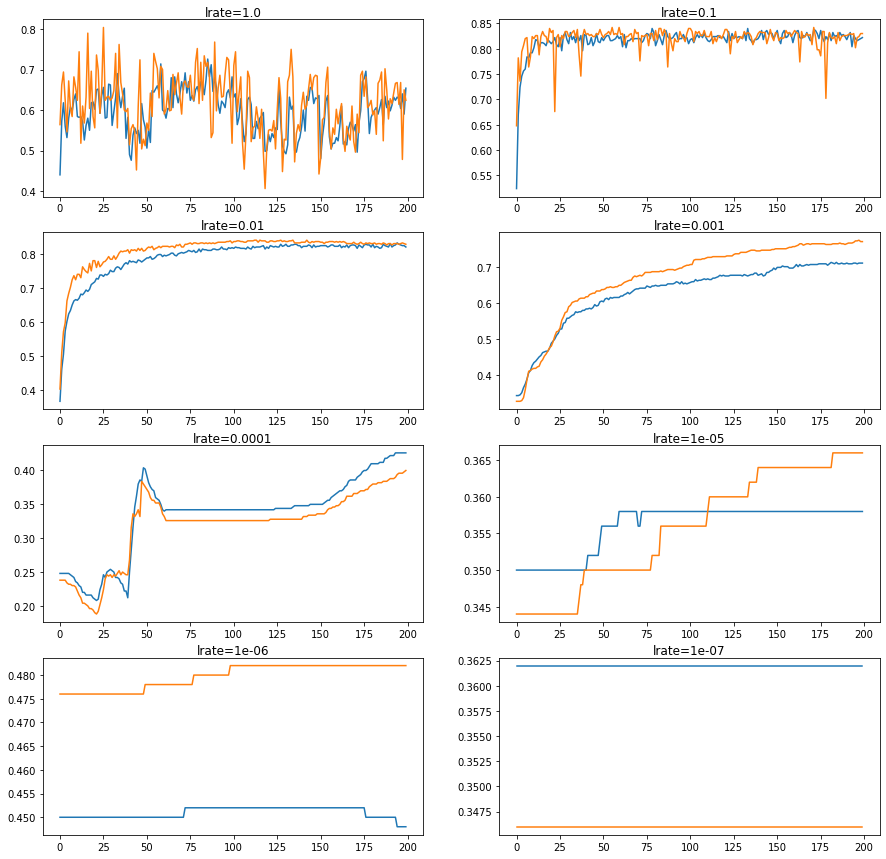

In [5]:
# prepare dataset
plt.figure(figsize=(15, 15))
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
for i in range(len(learning_rates)):
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    # fit model and plot learning curves for a learning rate
    fit_model(trainX, trainy, testX, testy, learning_rates[i])
# show learning curves
plt.show()

## Momentum Dynamics

Momentum can smooth the progression of the learning algorithm that, in turn, can accelerate the training process.

We will choose the learning rate of 0.01 that in the previous section converged to a reasonable solution, but required more epochs than the learning rate of 0.1

<font color=red><b> Define the same model architecture, but this time, modify the momentum for the learner. plot the results
<br>Hint: Add the momentum to the optimizer definition</b>
</font>

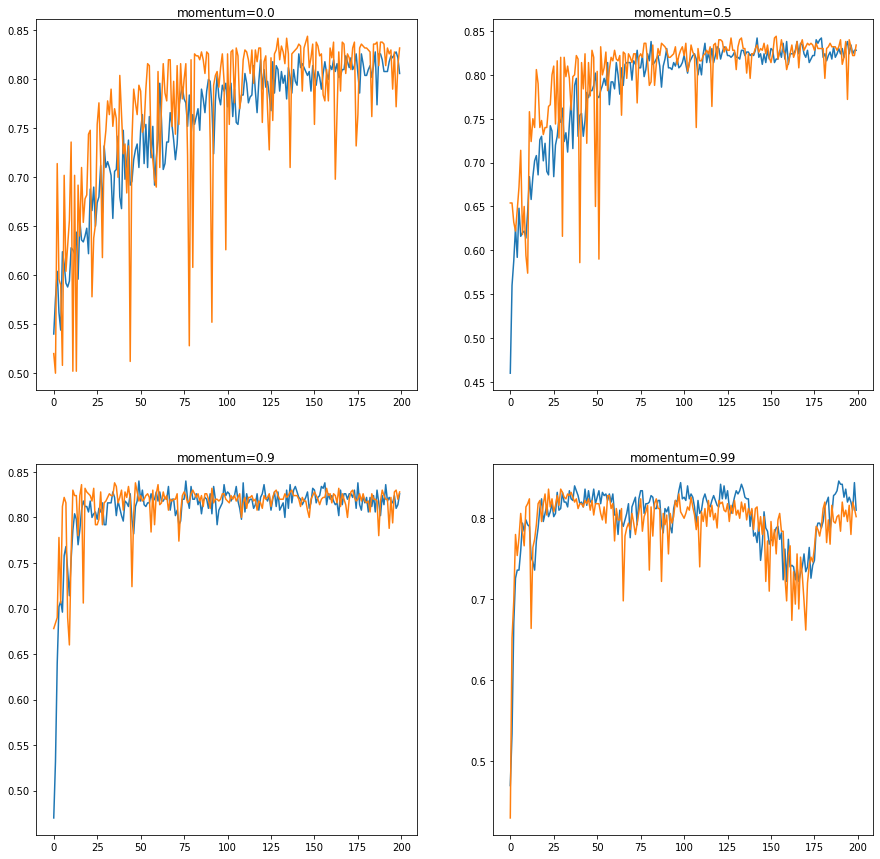

In [6]:

# fit a model and plot learning curve
def fit_model_momentum(trainX, trainy, testX, testy, momentum):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('momentum='+str(momentum), pad=-80) 


momentums = [0.0, 0.5, 0.9, 0.99]
plt.figure(figsize=(15, 15))
for i in range(len(momentums)):
    # determine the plot number
    plot_no = 220 + (i+1)
    plt.subplot(plot_no)
    # fit model and plot learning curves for a momentum
    fit_model_momentum(trainX, trainy, testX, testy, momentums[i])
# show learning curves
plt.show()

## Effect of Learning Rate Schedules

We will look at two learning rate schedules in this section.

The first is the decay built into the SGD class and the second is the ReduceLROnPlateau callback.
## Learning Rate Decay

We will see now the effects of adding a decay effect on the learning rate. This will make the lr to be smaller the more the network learns. 

$$lr = \frac{lr_0}{1+ decay\cdot t} $$

Where *t* is the iteration number and decay is que parameter we add.

<font color=red><b> Define the same model architecture, but this time,ad a learning rate decay. Plot the results
<br>Hint: Add the decay to the optimizer definition</b>
</font>

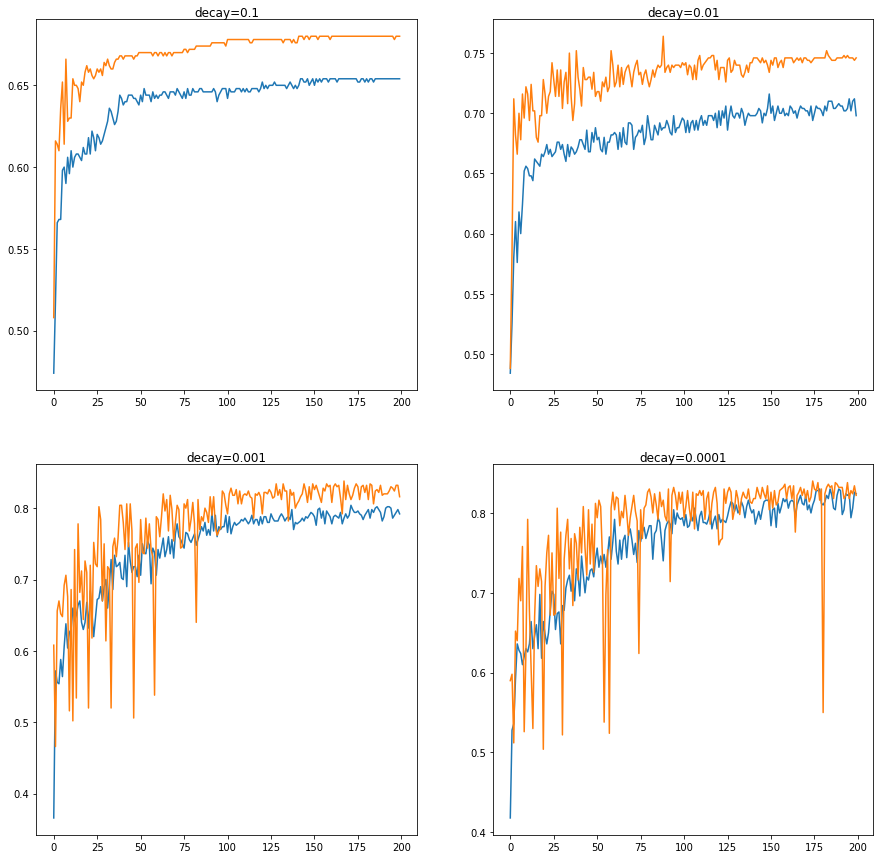

In [7]:
# fit a model and plot learning curve
def fit_model_decay(trainX, trainy, testX, testy, decay):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, decay=decay)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('decay='+str(decay), pad=-80)

# prepare dataset
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different decay rates
decay_rates = [1E-1, 1E-2, 1E-3, 1E-4]
plt.figure(figsize=(15, 15))
for i in range(len(decay_rates)):
    # determine the plot number
    plot_no = 220 + (i+1)
    plt.subplot(plot_no)
    # fit model and plot learning curves for a decay rate
    fit_model_decay(trainX, trainy, testX, testy, decay_rates[i])
    # show learning curves
plt.show()